In [2]:
# Fonots

# Használathoz fel kell tölteni a metric_____.log filét ha Google Colabon használod.

import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import os
import pickle
import joblib

import warnings 
# warnings.filterwarnings("ignore")

from datetime import datetime, date, time

from tensorflow import keras
from tensorflow.keras import layers

from rich.progress import track

from termcolor import colored

from sklearn.linear_model import LinearRegression

from pandas.plotting import scatter_matrix

print(tf.__version__)

import time
ost = time.time()

ost = time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())
print(ost)

ost = time.strftime("%H:%M:%S", time.gmtime())
print(ost)

2.10.0
2023-05-19 07:39:23
07:39:23


In [3]:
metric_file_name = 'metric_train_by_none.log'

In [4]:
df = pd.read_csv(metric_file_name, sep=',', header=0)

In [5]:
df.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,192.168.0.170,20:07:33,20:07:3,170.48660,122.845000,1,0.4,9.8,69.9,15.9,...,54914.0,727424.8,0.0,42991.2,100.0,182.8,182.8,182.9,182.3,182.4
1,192.168.0.170,20:07:42,20:07:4,173.23785,100.906500,3,1.0,9.5,69.5,15.5,...,47587.6,725717.6,0.0,37337.2,100.0,131.1,131.1,131.0,131.1,131.1
2,192.168.0.170,20:07:51,20:07:5,76.25155,69.350800,1,1.0,9.7,76.1,15.7,...,42023.2,724221.6,0.0,34854.0,100.0,235.0,235.0,235.0,235.0,235.1
3,192.168.0.170,20:08:01,20:08:0,169.67600,103.225818,1,1.1,8.6,79.8,14.4,...,38244.0,723113.6,0.0,28973.2,100.0,264.9,264.9,284.9,264.9,285.0
4,192.168.0.170,20:08:11,20:08:1,95.18005,72.214400,1,1.0,9.5,82.2,16.3,...,39842.8,724387.2,0.0,28122.8,100.0,259.4,259.4,260.1,259.4,260.2


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
response_time_p95,224.0,370.353299,724.126108,67.528050,84.439000,94.528150,145.046737,2800.500400
response_time,224.0,208.113452,436.441158,53.919527,70.298126,73.024617,87.004650,2415.910126
worker_number,224.0,4.941964,2.743313,1.000000,3.000000,5.000000,7.000000,9.000000
request_rate,224.0,15.723661,12.297403,0.100000,4.900000,13.750000,24.350000,40.100000
CPU0User%,224.0,22.253571,16.233290,5.100000,9.600000,14.850000,34.850000,57.800000
CPU0Idle%,224.0,50.551339,24.092075,0.100000,33.975000,59.300000,67.125000,86.300000
CPU0Total%,224.0,39.916964,29.724984,9.000000,16.175000,26.500000,63.775000,99.900000
[DSK:sda]Reads,224.0,107.448661,87.695564,3.800000,36.850000,65.500000,212.000000,307.100000
[DSK:sda]RMerge,224.0,81.942411,75.448909,0.000000,13.775000,53.350000,158.875000,238.800000
[DSK:sda]RKBytes,224.0,3428.738393,2950.415061,146.800000,1072.650000,1974.700000,6720.025000,10954.500000


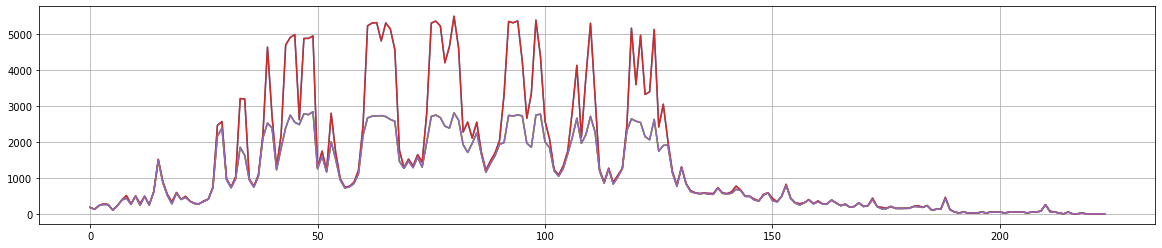

In [7]:
plt.figure(figsize=(20,4))
plt.plot(df['[TCPD]OutRequests'])
plt.plot(df['[TCPD]InDelivers'])
plt.plot(df['[TCPD]InReceives'])
plt.plot(df['[TCPD]OutSegs'])
plt.plot(df['[TCPD]InSegs'])
plt.grid()
plt.show()

In [8]:
df['worker_give_metrics'].unique()

array(['192.168.0.170'], dtype=object)

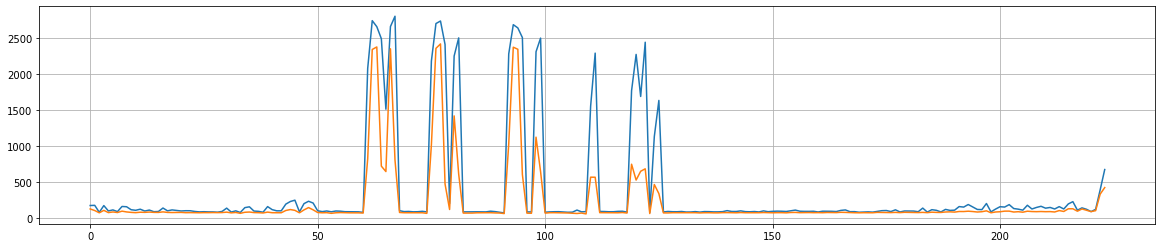

In [9]:
plt.figure(figsize=(20,4))
plt.plot(df['response_time_p95'])
plt.plot(df['response_time'])
plt.grid()
# plt.grid(axis='y')
plt.show()

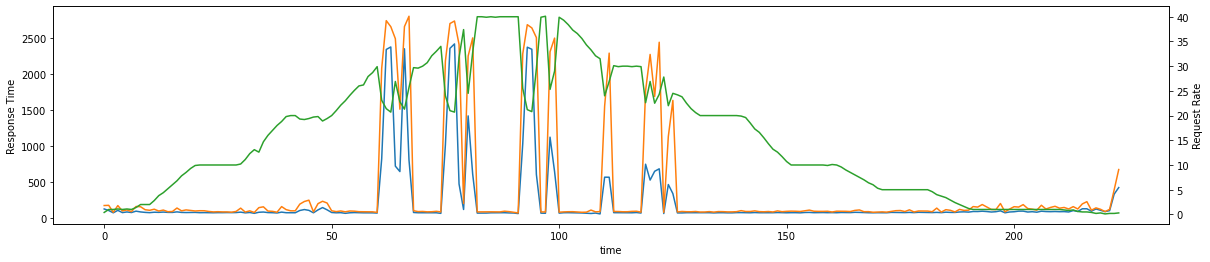

In [10]:

fig, ax1 = plt.subplots(figsize=(20, 4))

ax1.plot(df['response_time'], label = 'RT', color = 'C0')
ax1.plot(df['response_time_p95'], label = 'RT95%', color = 'C1')

ax2 = ax1.twinx()

ax2.plot(df['request_rate'], label = 'RR', color = 'C2')

ax1.set_xlabel('time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

plt.show()

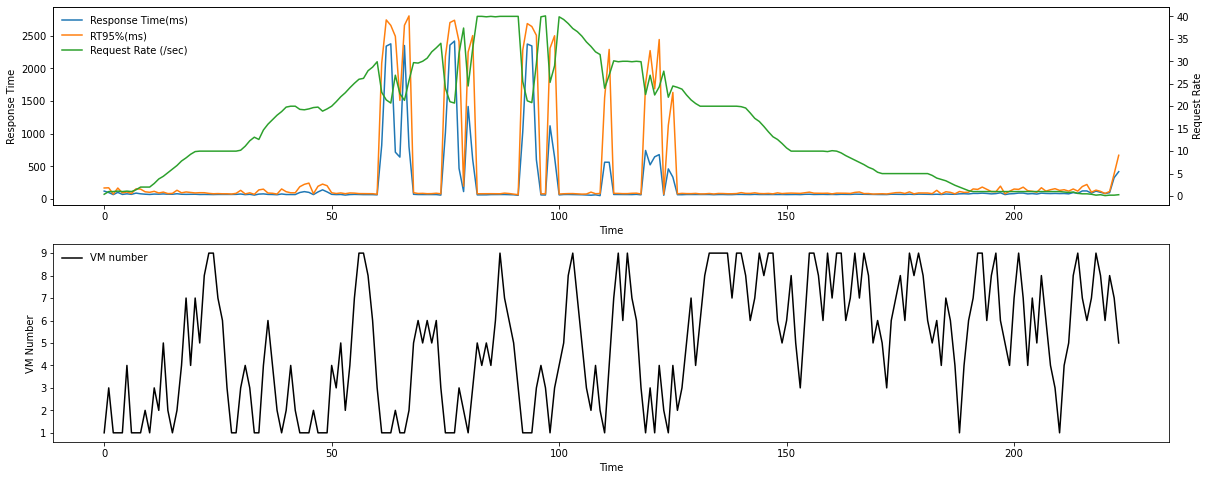

In [11]:

fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

l1 = ax1.plot(df['response_time'], color = 'C0', label='Response Time(ms)')
l2 = ax1.plot(df['response_time_p95'], color = 'C1', label='RT95%(ms)')

ax2 = ax1.twinx()

l3 = ax2.plot(df['request_rate'], color = 'C2', label='Request Rate (/sec)')

ax1.set_xlabel('Time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

ax3.plot(df['worker_number'], color = 'black', label='VM number')
ax3.set_xlabel('Time')
ax3.set_ylabel('VM Number')
ax3.legend(loc=2, frameon=False)

lns = l1+l2+l3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=2, frameon=False)

plt.show()

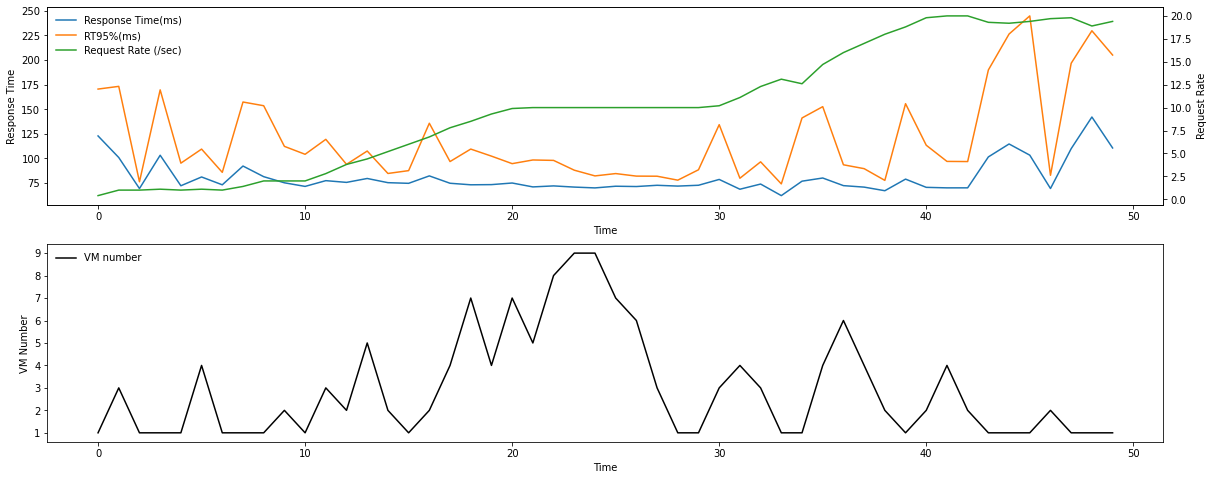

In [12]:
FROM = 0
TO   = 50

fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

l1 = ax1.plot(df['response_time'][FROM:TO], color = 'C0', label='Response Time(ms)')
l2 = ax1.plot(df['response_time_p95'][FROM:TO], color = 'C1', label='RT95%(ms)')

ax2 = ax1.twinx()

l3 = ax2.plot(df['request_rate'][FROM:TO], color = 'C2', label='Request Rate (/sec)')

ax1.set_xlabel('Time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

ax3.plot(df['worker_number'][FROM:TO], color = 'black', label='VM number')
ax3.set_xlabel('Time')
ax3.set_ylabel('VM Number')
ax3.legend(loc=2, frameon=False)

lns = l1+l2+l3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=2, frameon=False)

plt.show()

## Arra vagyok kíváncsi, hogy

Csupán a bejövő kérések száma és a vm-ek száma alapján meg lehet-e tanítani a neurális hálót,
hogy mi lesz a várható válaszidő.


In [13]:
# Átállítom a színeket

from cycler import cycler
import matplotlib as mpl

colormap = plt.get_cmap('jet')
colors = [colormap(k) for k in np.linspace(0, 1, 10)]

mpl.rcParams['axes.prop_cycle'] = cycler(color=colors)

In [14]:
def plot_true_vs_pred(true, pred):
    plt.axes(aspect='equal')
    plt.scatter(true, pred)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    _min = np.min((np.min(true), np.min(pred)))
    _max = np.max((np.max(true), np.max(pred)))
    _min -= _min/10
    _max += _max/10
    lims = [_min, _max]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)
    plt.show()

# plot_true_vs_pred(f3['CPU0User%'], pred_cpu)

In [15]:
def plot_true_vs_pred_two(true1, pred1, true2, pred2):
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(4.0*2, 4.0))
    
    ax0.axis('equal')
    ax0.set_aspect('equal', 'box')
    ax0.scatter(true1, pred1)
    ax0.set_xlabel('True Values')
    ax0.set_ylabel('Predictions')
    _min = np.min((np.min(true1), np.min(pred1)))
    _max = np.max((np.max(true1), np.max(pred1)))
    _min -= _min/10
    _max += _max/10
    lims = [_min, _max]
    ax0.set_xlim(lims)
    ax0.set_ylim(lims)
    _ = ax0.plot(lims, lims)
    
    ax1.axis('equal')
    ax1.set_aspect('equal', 'box')
    ax1.scatter(true2, pred2)
    ax1.set_xlabel('True Values')
    ax1.set_ylabel('Predictions')
    _min = np.min((np.min(true1), np.min(pred1)))
    _max = np.max((np.max(true1), np.max(pred1)))
    _min -= _min/10
    _max += _max/10
    lims = [_min, _max]
    ax1.set_xlim(lims)
    ax1.set_ylim(lims)
    _ = ax1.plot(lims, lims)
    
    plt.show()

# plot_true_vs_pred_two(f3['CPU0User%'], pred_cpu, f3['CPU0User%Next'], pred_cpu)

In [16]:
def plot_true_vs_pred_hist(true, pred):

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    # start with a rectangular Figure
    plt.figure(figsize=(4.8, 4.8))

    ax_scatter = plt.axes(rect_scatter)
    ax_scatter.tick_params(direction='in', top=True, right=True)
    ax_histx = plt.axes(rect_histx)
    ax_histx.tick_params(direction='in', labelbottom=False)
    ax_histy = plt.axes(rect_histy)
    ax_histy.tick_params(direction='in', labelleft=False)

    # the scatter plot:
    ax_scatter.scatter(true, pred)

    # now determine nice limits by hand:
    binwidth = 3.00
    lim = np.ceil(np.abs([true, pred]).max() / binwidth) * binwidth
    
    _min = np.min((np.min(true), np.min(pred)))
    _max = np.max((np.max(true), np.max(pred)))
    #_min -= _min/10
    #_max += _max/10
    lims = [_min, _max]
    ax_scatter.plot(lims, lims)
    
    ax_scatter.set_xlim((lims))
    ax_scatter.set_ylim((lims))
    ax_scatter.set_xlabel('True Values')
    ax_scatter.set_ylabel('Predictions')

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(true, bins=bins)
    ax_histy.hist(pred, bins=bins, orientation='horizontal')

    ax_histx.set_xlim(ax_scatter.get_xlim())
    ax_histy.set_ylim(ax_scatter.get_ylim())

    plt.show()

# plot_true_vs_pred_hist(f3['CPU0User%'].values, pred_cpu)

# plot_true_vs_pred_hist(f3['CPU0User%Next'].values, pred_cpu)

In [16]:
import scipy.stats as stats

def calc_true_pred_stats(true, pred, show=True):
    
    slope, intercept = np.polyfit(true, pred, 1)  # linear model adjustment
    y_model = np.polyval([slope, intercept], true)   # modeling...
    
    if show == True:
        print('slope {:.2f} int {:.2f}'.format(slope, intercept))

    true_mean = np.mean(true)
    pred_mean = np.mean(pred)
    n = true.size                     # number of samples
    m = 3                             # number of parameters
    dof = n - m                       # degrees of freedom
    t = stats.t.ppf(0.975, dof)       # Students statistic of interval confidence
    
    residual = true - pred
    
    std_error = (np.sum(residual**2) / dof)**.5   # Standard deviation of the error
    
    # calculating the r2
    # https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/
    # Pearson's correlation coefficient
    numerator = np.sum((true - true_mean)*(pred - pred_mean))
    denominator = ( np.sum((true - true_mean)**2) * np.sum((pred - pred_mean)**2) )**.5
    correlation_coef = numerator / denominator
    r2 = correlation_coef**2
    r  = np.sqrt(r2)
    
    n = true.size
    mse = 1/n * np.sum( (true - pred)**2 )
    
    if show == True:
        print('r2 {:.2f}'.format(r2))
        print('r  {:.2f}'.format(r))
        print('mse {:.2f}'.format(mse))
    
    return {'slope': slope, 'intercept': intercept, 'r2': r2, 'r': r, 'mse': mse}

In [17]:
import scipy.stats as stats

def plot_true_vs_pred_hist_conf(true, pred, binwidth=3.00):

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    # start with a rectangular Figure
    plt.figure(figsize=(4.8, 4.8))

    ax_scatter = plt.axes(rect_scatter)
    ax_scatter.tick_params(direction='in', top=True, right=True)
    ax_histx = plt.axes(rect_histx)
    ax_histx.tick_params(direction='in', labelbottom=False)
    ax_histy = plt.axes(rect_histy)
    ax_histy.tick_params(direction='in', labelleft=False)

    # the scatter plot:
    ax_scatter.scatter(true, pred)

    # now determine nice limits by hand:
    # binwidth = 3.00
    binwidth = binwidth
    
    lim = np.ceil(np.abs([true, pred]).max() / binwidth) * binwidth
    
    _min = np.min((np.min(true), np.min(pred)))
    _max = np.max((np.max(true), np.max(pred)))
    #_min -= _min/10
    #_max += _max/10
    lims = [_min, _max]
    ax_scatter.plot(lims, lims)
    
    ax_scatter.set_xlim((lims))
    ax_scatter.set_ylim((lims))
    ax_scatter.set_xlabel('True Values')
    ax_scatter.set_ylabel('Predictions')

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(true, bins=bins)
    ax_histy.hist(pred, bins=bins, orientation='horizontal')

    ax_histx.set_xlim(ax_scatter.get_xlim())
    ax_histy.set_ylim(ax_scatter.get_ylim())
    
    ax_histx.spines['right'].set_visible(False)
    ax_histx.spines['top'].set_visible(False)
    
    ax_histy.spines['right'].set_visible(False)
    ax_histy.spines['top'].set_visible(False)
    # ax_histx.axis('off')
    # ax_histy.axis('off')
    
    # ---------------------------------------------------------------
    
    slope, intercept = np.polyfit(true, pred, 1)  # linear model adjustment
    y_model = np.polyval([slope, intercept], true)   # modeling...
    
    print('slope {:.2f} int {:.2f}'.format(slope, intercept))

    true_mean = np.mean(true)
    pred_mean = np.mean(pred)
    n = true.size                     # number of samples
    m = 3                             # number of parameters
    dof = n - m                       # degrees of freedom
    t = stats.t.ppf(0.975, dof)       # Students statistic of interval confidence
    
    residual = true - pred
    
    std_error = (np.sum(residual**2) / dof)**.5   # Standard deviation of the error
    
    # calculating the r2
    # https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/
    # Pearson's correlation coefficient
    numerator = np.sum((true - true_mean)*(pred - pred_mean))
    denominator = ( np.sum((true - true_mean)**2) * np.sum((pred - pred_mean)**2) )**.5
    correlation_coef = numerator / denominator
    r2 = correlation_coef**2
    r  = np.sqrt(r2)
    print('r2 {:.2f}'.format(r2))
    print('r  {:.2f}'.format(r))
    
    n = true.size
    mse = 1/n * np.sum( (true - pred)**2 )
    print('mse {:.2f}'.format(mse))
    
    # to plot the adjusted model
    true_line = np.linspace(np.min(true), np.max(true), 100)
    true_line = np.linspace(min(np.min(true),np.min(pred)), max(np.max(true),np.max(pred)), 100)
    
    pred_line = np.polyval([slope, intercept], true_line)
    
    # confidence interval
    ci = t * std_error * (1/n + (true_line - true_mean)**2 / np.sum((true - true_mean)**2))**.5
    # predicting interval
    pi = t * std_error * (1 + 1/n + (true_line - true_mean)**2 / np.sum((true - true_mean)**2))**.5  

    ax_scatter.plot(true_line, pred_line)
    ax_scatter.fill_between(true_line, pred_line + pi, pred_line - pi, color = 'lightcyan', label = '95% prediction interval')
    ax_scatter.fill_between(true_line, pred_line + ci, pred_line - ci, color = 'skyblue', label = '95% confidence interval')

    # the scatter plot (again):
    ax_scatter.scatter(true, pred)
    
    # rounding and position must be changed for each case and preference
    a = str(np.round(intercept))
    b = str(np.round(slope,2))
    r2s = str(np.round(r2,2))
    MSEs = str(np.round(mse))
    
    # ax_scatter.text(20, 64, 'y = ' + a + ' + ' + b + ' x')
    # ax_scatter.text(20, 60, '$r^2$ = ' + r2s + '     MSE = ' + MSEs)
    
    # ax_scatter.legend(fontsize=12)
    ax_scatter.legend(frameon=False)
    
    
    # a belső (pici) 95% Confidence region
    # a külső (nagy) 95% Confidence interval
    
    plt.show()


In [21]:
def plot_pred(pred_rt):
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

    l1 = ax1.plot(df['response_time'], color = 'C0', label='Response Time(ms)')
    l2 = ax1.plot(df['response_time_p95'], color = 'C1', label='RT95%(ms)')
    l3 = ax1.plot(pred_rt, color = 'C10', ls = '--', label='Pred RT(ms)')

    ax2 = ax1.twinx()

    l4 = ax2.plot(df['request_rate'], color = 'C2', label='Request Rate (/sec)')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time')
    ax2.set_ylabel('Request Rate')

    ax3.plot(df['worker_number'], color = 'black', label='VM number')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')
    ax3.legend(loc=2, frameon=False)

    lns = l1+l2+l3+l4
    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc=2, frameon=False)

    plt.show()

In [23]:
def plot_pred_short(train_labels, predicted_labels):
    
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

    ax1.plot(df['response_time'], color = 'C0')
    # ax1.plot(mf['response_time_p95'], color = 'C1')
    
    # ax1.plot(train_labels, color = 'orange')
    ax1.plot(predicted_labels, color = 'black', ls = '--')

    # ax2 = ax1.twinx()

    # ax2.plot(mf['request_rate'], color = 'C2')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time')
    # ax2.set_ylabel('Request Rate')

    ax3.plot(df['worker_number'], color = 'black')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')

    plt.show()

# Oké tehát itt jön ami érdekel

----

## Első körben

## Lináris regresszió RT ~ RR

Meg lehet-e becsülni a válaszidőt csupán a bejövö kérések számával?

**Spoiler:** Nem

(224, 1)
score  = 0.024576158336887755
coef   = [5.5637716]
intcpt = 120.63059513522369
slope 0.02 int 203.00
r2 0.02
r  0.16
mse 184970.13


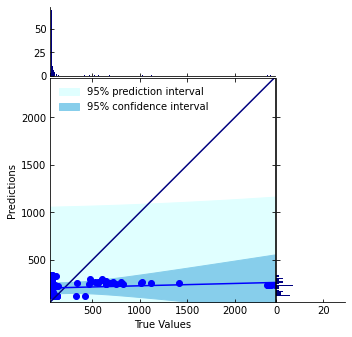

In [18]:
lr = LinearRegression(fit_intercept=True)

inputs = df[['request_rate']]
output = df['response_time']

print(inputs.shape)

rr = lr.fit(inputs, output)
fit_score = rr.score(inputs, output)
fit_coef_ = rr.coef_
fit_intercept_ = rr.intercept_

print('score  =', fit_score)
print('coef   =', fit_coef_)
print('intcpt =', fit_intercept_)

pred_rt = rr.predict(inputs)

plot_true_vs_pred_hist_conf(output, pred_rt, 3.0)

## Második körben

## Lineáris regresszió RT ~ Worker Number

Meg lehet-e becsülni a várható válaszidőt csupán a bekapcsolt workerek számával?

**Spoiler:** Nem

(224, 1)
score  = 0.15067049432305102
coef   = [-61.75391375]
intcpt = 513.2990883826374
slope 0.15 int 176.76
r2 0.15
r  0.39
mse 161058.80


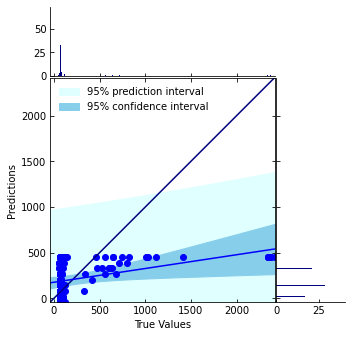

In [19]:
lr = LinearRegression(fit_intercept=True)

inputs = df[['worker_number']]
output = df['response_time']

print(inputs.shape)

rr = lr.fit(inputs, output)
fit_score = rr.score(inputs, output)
fit_coef_ = rr.coef_
fit_intercept_ = rr.intercept_

print('score  =', fit_score)
print('coef   =', fit_coef_)
print('intcpt =', fit_intercept_)

pred_rt = rr.predict(inputs)

plot_true_vs_pred_hist_conf(output, pred_rt, 3.0)

## Harmadik körben

## Lineáris regresszió RT ~ RR + Worker Number

Meg lehet-e becsülni a várható válaszidőt a bejövő kérések számával és a bekapcsolt workerek számával?

**Spoiler:** Nem

(224, 2)
score  = 0.16160617037918024
coef   = [  3.74670732 -59.45287811]
intcpt = 443.01549766708024
slope 0.16 int 174.48
r2 0.16
r  0.40
mse 158985.06


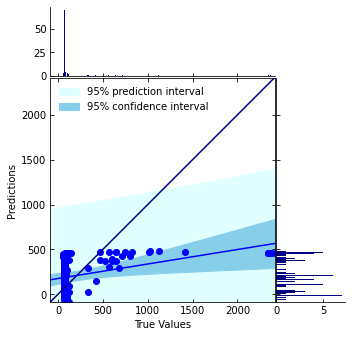

In [20]:
lr = LinearRegression(fit_intercept=True)

inputs = df[['request_rate', 'worker_number']]
output = df['response_time']

print(inputs.shape)

rr = lr.fit(inputs, output)
fit_score = rr.score(inputs, output)
fit_coef_ = rr.coef_
fit_intercept_ = rr.intercept_

print('score  =', fit_score)
print('coef   =', fit_coef_)
print('intcpt =', fit_intercept_)

pred_rt = rr.predict(inputs)

plot_true_vs_pred_hist_conf(output, pred_rt, 3.0)

(224, 3)
score  = 0.22038099034747927
coef   = [22.17245833 -4.5682239  -3.6586839 ]
intcpt = 149.52336595948333
slope 0.22 int 162.25
r2 0.22
r  0.47
mse 147839.56


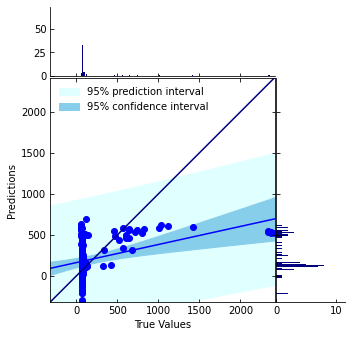

In [49]:
df['rr_wn'] = df['request_rate'] * df['worker_number']

lr = LinearRegression(fit_intercept=True)

inputs = df[['request_rate', 'worker_number', 'rr_wn']]
output = df['response_time']

print(inputs.shape)

rr = lr.fit(inputs, output)
fit_score = rr.score(inputs, output)
fit_coef_ = rr.coef_
fit_intercept_ = rr.intercept_

print('score  =', fit_score)
print('coef   =', fit_coef_)
print('intcpt =', fit_intercept_)

pred_rt = rr.predict(inputs)

plot_true_vs_pred_hist_conf(output, pred_rt, 3.0)

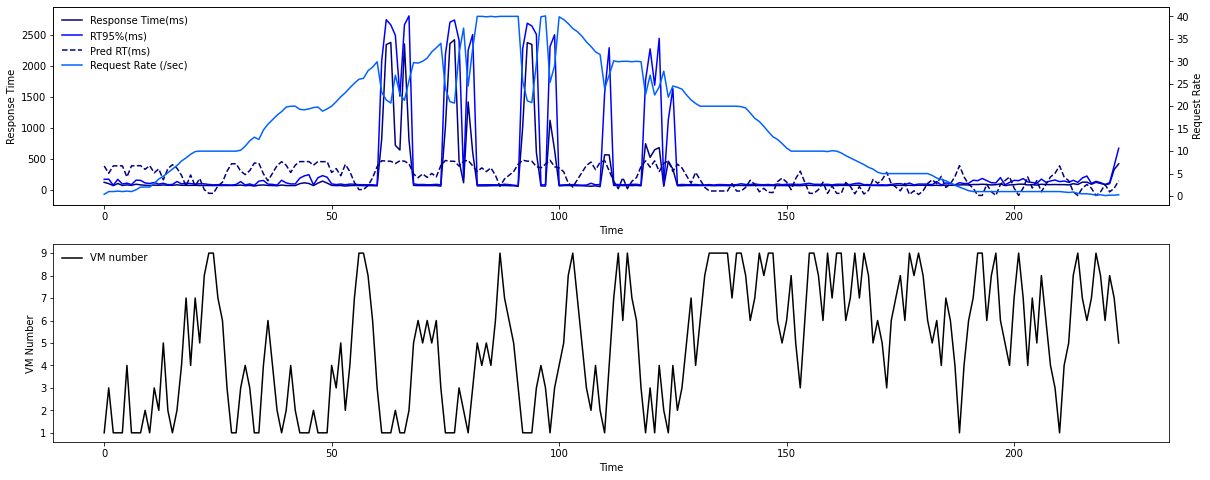

In [22]:
plot_pred(pred_rt)

# Hála istennek

Az látszik hogy lineáris regresszióval simán a bejövő kérések számával a vm-ek számával és a kettő közötti interakcióval nem lehet megmondani, hogy mi lesz a várható válaszidő.

### Azért ezt a még a stat modellel is leelenőrzöm

In [27]:
inputs = df[['request_rate', 'worker_number']]
output = df['response_time']

<class 'pandas.core.frame.DataFrame'> (224, 3)
------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:          response_time   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     21.30
Date:                Fri, 19 May 2023   Prob (F-statistic):           3.48e-09
Time:                        07:53:13   Log-Likelihood:                -1659.2
No. Observations:                 224   AIC:                             3324.
Df Residuals:                     221   BIC:                             3335.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--

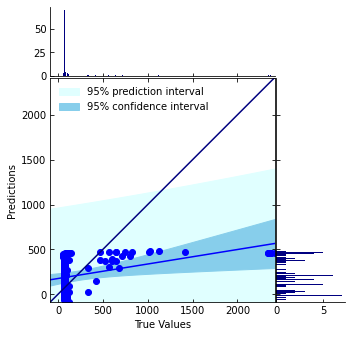

In [29]:
import statsmodels.api as sm

_x = sm.add_constant(inputs)

print(type(_x), _x.shape)

model = sm.OLS(output, _x)

results = model.fit()

print('------------------------------------------------------------------------------')
print(results.summary())
print('------------------------------------------------------------------------------')

print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
print(f'\nregression coefficients: {results.params}')    
pred_rt_sm = results.fittedvalues
pred_rt_sm = results.predict(_x)
print('------------------------------------------------------------------------------')

plot_true_vs_pred_hist_conf(output, pred_rt_sm, 3.0)

## Az sm-mel kapott eredmények ugyan ezt erősítik meg.

Nem lehet jól de még csak közelítőleg jól sem becsülni a válaszidőt a bejövő kérések száma,
a workerek száma és a kettő közötti interakció alapján sem.

Azért az felmerült még bennem, hogy mi lenne ha magasabb order is lenne.

<class 'pandas.core.frame.DataFrame'> (224, 7)
------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:          response_time   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     21.12
Date:                Fri, 19 May 2023   Prob (F-statistic):           1.80e-19
Time:                        07:54:26   Log-Likelihood:                -1627.4
No. Observations:                 224   AIC:                             3269.
Df Residuals:                     217   BIC:                             3293.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--

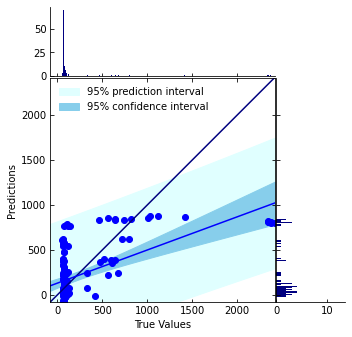

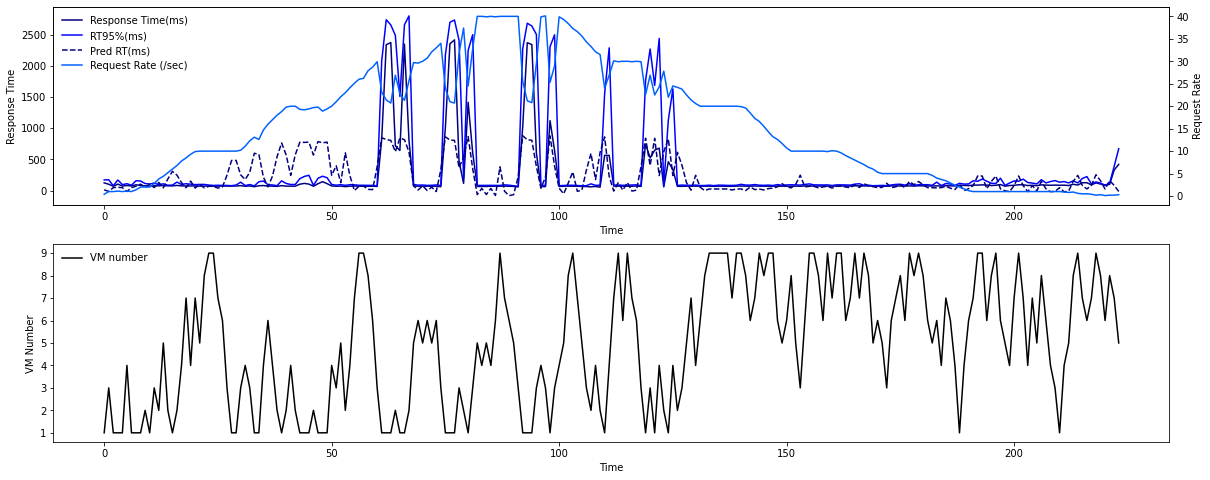

In [30]:
df['rr_wn'] = df['request_rate'] * df['worker_number']
df['rr2'] = df['request_rate'] * df['request_rate']
df['wm2'] = df['worker_number'] * df['worker_number']
df['rr2_wm2'] = df['rr2'] * df['wm2']

inputs = df[['request_rate', 'worker_number', 'rr_wn', 'rr2', 'wm2', 'rr2_wm2']]
output = df['response_time']

import statsmodels.api as sm

_x = sm.add_constant(inputs)

print(type(_x), _x.shape)

model = sm.OLS(output, _x)

results = model.fit()

print('------------------------------------------------------------------------------')
print(results.summary())
print('------------------------------------------------------------------------------')

print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
print(f'\nregression coefficients: {results.params}')    
pred_rt_sm = results.fittedvalues
pred_rt_sm = results.predict(_x)
print('------------------------------------------------------------------------------')

plot_true_vs_pred_hist_conf(output, pred_rt_sm, 3.0)

plot_pred(pred_rt_sm)

### Sajnos ez már nem annyira rossz,

De jó hír, hogy még ez is használhatatlan. Ezek a t ények mind a neurális háló használata mellett szólnak.

Nézzük magasabb polinomok esetén mi van:

<class 'numpy.ndarray'> (224, 10)
------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:          response_time   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     17.51
Date:                Fri, 19 May 2023   Prob (F-statistic):           5.29e-20
Time:                        07:58:15   Log-Likelihood:                -1622.8
No. Observations:                 224   AIC:                             3264.
Df Residuals:                     215   BIC:                             3294.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

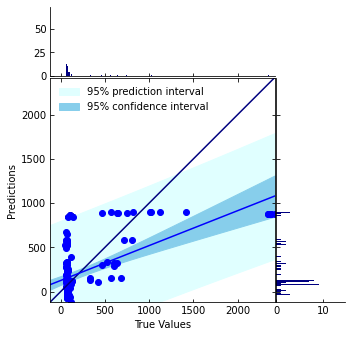

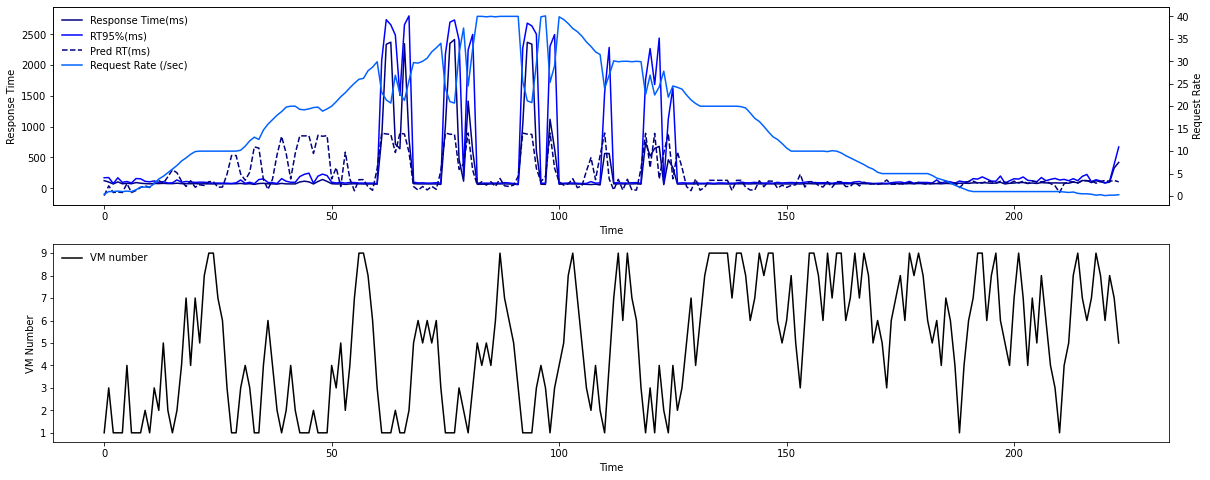

In [37]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=2)

inputs = df[['request_rate', 'worker_number', 'rr_wn']]
output = df['response_time']

inputs = polynomial_features.fit_transform(inputs)
#print(inputs.shape)
#print(inputs[:1, :])

import statsmodels.api as sm

_x = sm.add_constant(inputs)

_x = inputs

print(type(_x), _x.shape)

model = sm.OLS(output, _x)

results = model.fit()

print('------------------------------------------------------------------------------')
print(results.summary())
print('------------------------------------------------------------------------------')

print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
# print(f'\nregression coefficients: {results.params}')    
pred_rt_sm = results.fittedvalues
pred_rt_sm = results.predict(_x)
print('------------------------------------------------------------------------------')

plot_true_vs_pred_hist_conf(output, pred_rt_sm, 3.0)

plot_pred(pred_rt_sm)

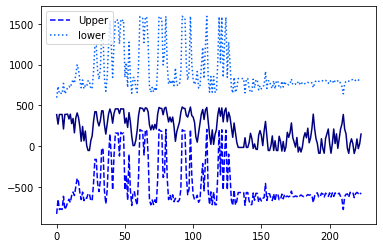

In [39]:
# Ha valaha úgy érezném, hogy a statisztikai modell konfidencia intervallumára lenne szükésegem

from statsmodels.sandbox.regression.predstd import wls_prediction_std

# https://ostwalprasad.github.io/machine-learning/Polynomial-Regression-using-statsmodel.html

_, upper,lower = wls_prediction_std(results)

plt.plot(pred_rt)
plt.plot(upper,'--',label="Upper")
plt.plot(lower,':',label="lower")
plt.legend(loc='upper left')

## Meg kéne nézni úgy is, hogy a vm szám kategóriára van kódolva

In [96]:
# https://notebook.community/datascienceguide/datascienceguide.github.io/tutorials/multiple_regression_in_python

In [40]:
df['worker_number'].unique().size

9

In [41]:
df['worker_number'].unique()

array([1, 3, 4, 2, 5, 7, 8, 9, 6])

In [42]:
wm = df['worker_number'].values

In [43]:
# kategórizáció scikit learnnel

import sklearn.preprocessing
a = wm
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(a)+1))
b = label_binarizer.transform(a)
print('{0}'.format(b))
print('{0}'.format(b.shape))

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
(224, 10)


In [44]:
# kategórizáció kerassal

from keras.utils.np_utils import to_categorical   

fos = to_categorical(wm, num_classes=10)

print('{0}'.format(fos))
print('{0}'.format(fos.shape))

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(224, 10)


In [45]:
# hozzá kell még adnom azt a változót amit nem kategorizáltam

inputs = np.hstack((df['request_rate'].values.reshape(-1, 1), fos))

print('{0}'.format(inputs.shape))
print('{0}'.format(inputs))

(224, 11)
[[0.4 0.  1.  ... 0.  0.  0. ]
 [1.  0.  0.  ... 0.  0.  0. ]
 [1.  0.  1.  ... 0.  0.  0. ]
 ...
 [0.2 0.  0.  ... 0.  1.  0. ]
 [0.2 0.  0.  ... 1.  0.  0. ]
 [0.3 0.  0.  ... 0.  0.  0. ]]


<class 'numpy.ndarray'> (224, 12)
------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:          response_time   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     9.807
Date:                Fri, 19 May 2023   Prob (F-statistic):           1.53e-12
Time:                        08:02:00   Log-Likelihood:                -1640.3
No. Observations:                 224   AIC:                             3301.
Df Residuals:                     214   BIC:                             3335.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

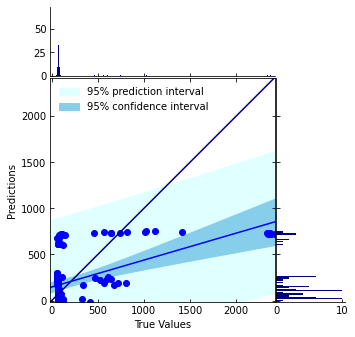

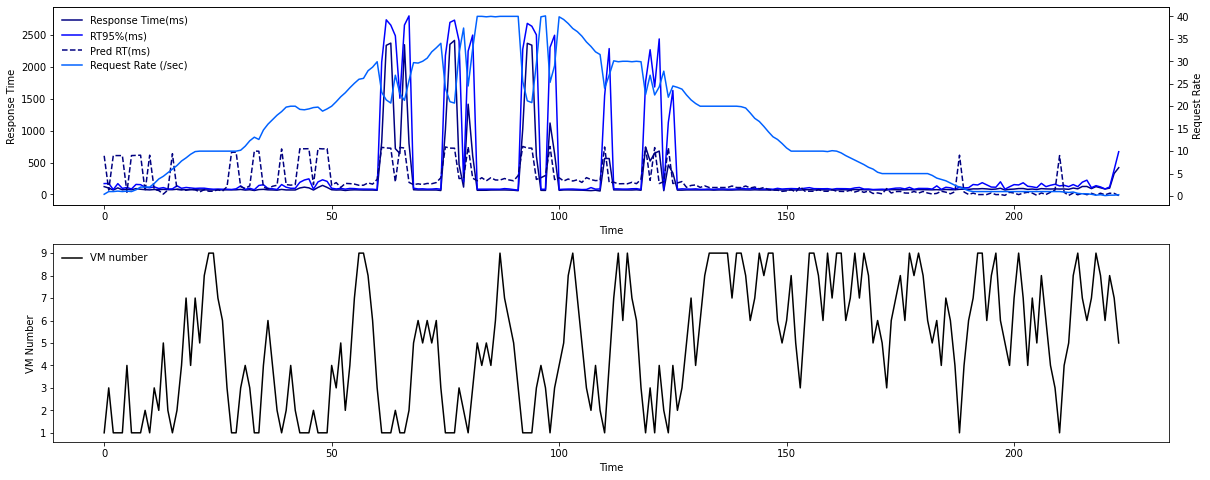

In [50]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=1)

inputs = df[['request_rate', 'worker_number', 'rr_wn']]
inputs = np.hstack((df['request_rate'].values.reshape(-1, 1), fos))

output = df['response_time']

inputs = polynomial_features.fit_transform(inputs)
#print(inputs.shape)
#print(inputs[:1, :])

import statsmodels.api as sm

_x = sm.add_constant(inputs)

_x = inputs

print(type(_x), _x.shape)

model = sm.OLS(output, _x)

results = model.fit()

print('------------------------------------------------------------------------------')
print(results.summary())
print('------------------------------------------------------------------------------')

print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
# print(f'\nregression coefficients: {results.params}')    
pred_rt_sm = results.fittedvalues
pred_rt_sm = results.predict(_x)
print('------------------------------------------------------------------------------')

plot_true_vs_pred_hist_conf(output, pred_rt_sm, 3.0)

plot_pred(pred_rt_sm)

## Kategóriára kódolva

Kibróbáltam így is (egész magas n=3 polinomokkal is) és így sem ad jó eredményet. (ez megnnyugató)

## Tehát a jó hír

Hogy magasabb polinomok esetében sem képes jó becsést adni.

Tehát a Lineáris regresszió nem állta ki a próbát

## Most ugyan ez neurális hálóval

## NN RT ~ RR

Meg lehet-e becsülni a válaszidőt csupán a bejövö kérések számával?

**Spoiler:** Nem

In [57]:
import tqdm
import tensorflow as tf
import tensorflow_addons as tfa
tf.get_logger().setLevel('INFO')

# sets seeds for base-python, numpy and tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

# initialize tqdm callback with default parameters
tqdm_callback = tfa.callbacks.TQDMProgressBar(leave_epoch_progress=False,
                                              leave_overall_progress=True,
                                              show_epoch_progress=False,
                                              show_overall_progress=True)

In [53]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [RT]')
    plt.legend()
    plt.grid(True)

In [54]:
inputs[0:3, :]

array([[1. , 0.4, 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 1. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 1. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

In [56]:
# Csak a jó linregesek (17.8%)
input_variables = ['request_rate',
                   'CPU0Idle%',
                   '[NUMA:0]Anon',
                   '[NUMA:0]Mapped',
                   '[NUMA:0]Inactive',
                   '[TCPD]InSegs',
                   '[TCPD]OutSegs']

# Fent -> hiába tökéletes a model az actionok után hülyeségeket mond

# A kevesebb több (24.8%)
input_variables = ['request_rate',
                   'CPU0User%',
                   '[TCPD]OutSegs']

# Fent -> még akkor is ha ez a model rosszabb becslést ad az actionok után sokkal jobb


# Most csak arra vagyok kíváncsi, hogy csak a 'request_rate', csak 'worker_number' és a kettő alapján
# képes-e elérni a neurális háló ugyan azt az eredményt amit a fenti metriákkal sikerült neki
train_features = inputs # 'request_rate' és 'woker_number' (kategóriára kódolva)

train_labels = df[['response_time']]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

with np.printoptions(precision=2, suppress=True):
    print(normalizer.mean.numpy())

first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print('Normalized   :', normalizer(first).numpy())

first_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(30, activation='tanh'),
    tf.keras.layers.Dense(15, activation='ReLU'),
    layers.Dense(units=1)
])

first_model.summary()

first_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


[[ 1.   15.72  0.    0.17  0.07  0.09  0.11  0.09  0.13  0.1   0.08  0.15]]
First example: [[1.  0.4 0.  1.  0.  0.  0.  0.  0.  0.  0.  0. ]]
Normalized   : [[ 0.   -1.25  0.    2.18 -0.28 -0.32 -0.35 -0.32 -0.39 -0.34 -0.29 -0.42]]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 30)                390       
                                                                 
 dense_4 (Dense)             (None, 15)                465       
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 896


Training:   0%|           0/1500 ETA: ?s,  ?epochs/s

2023-05-19 08:06:00.198772: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-19 08:06:13.961955: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-19 08:06:14.008669: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-19 08:06:14.052750: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-19 08:06:14.091684: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-19 08:06:36.966016: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-19 08:06:48.393025: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-19 08:06:49.688817: W tensorflow/core/data/root_dataset.cc:26

CPU times: user 1min 7s, sys: 2.59 s, total: 1min 9s
Wall time: 1min 22s


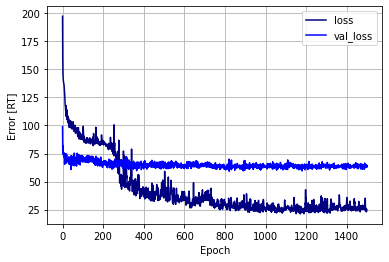

In [58]:
%%time
history = first_model.fit(
    train_features,
    train_labels,
    epochs = 1500,
    # batch_size = 300,
    verbose = 0,
    callbacks=[tqdm_callback],
    validation_split = 0.05)

plot_loss(history)

7/7 [==============================] - 0s 2ms/step


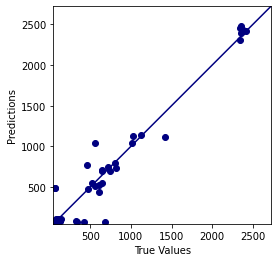

In [59]:
pred_rt_nn = first_model.predict(train_features)

pred_rt_nn = np.squeeze(pred_rt_nn, 1)

plot_true_vs_pred(train_labels.values, pred_rt_nn)

slope 1.00 int -1.54
r2 0.97
r  0.98
mse 6738.49


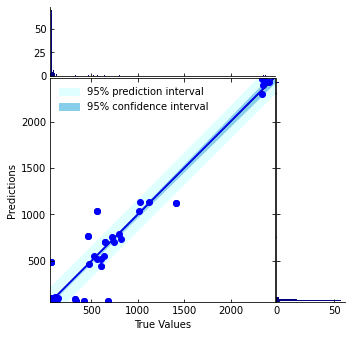

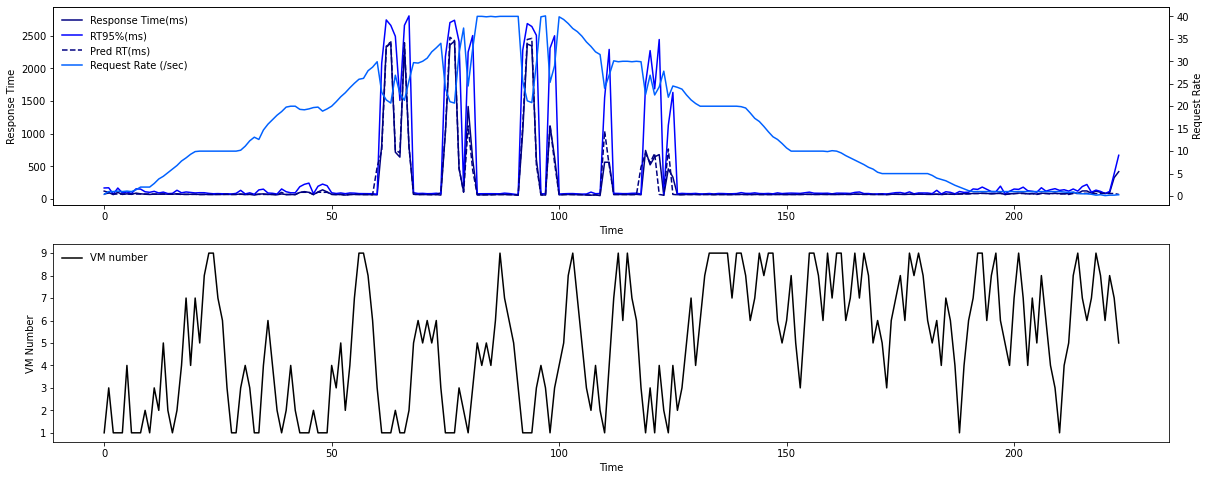

In [60]:
plot_true_vs_pred_hist_conf(np.squeeze(train_labels.values, 1), pred_rt_nn, 3.0)

plot_pred(pred_rt_nn)

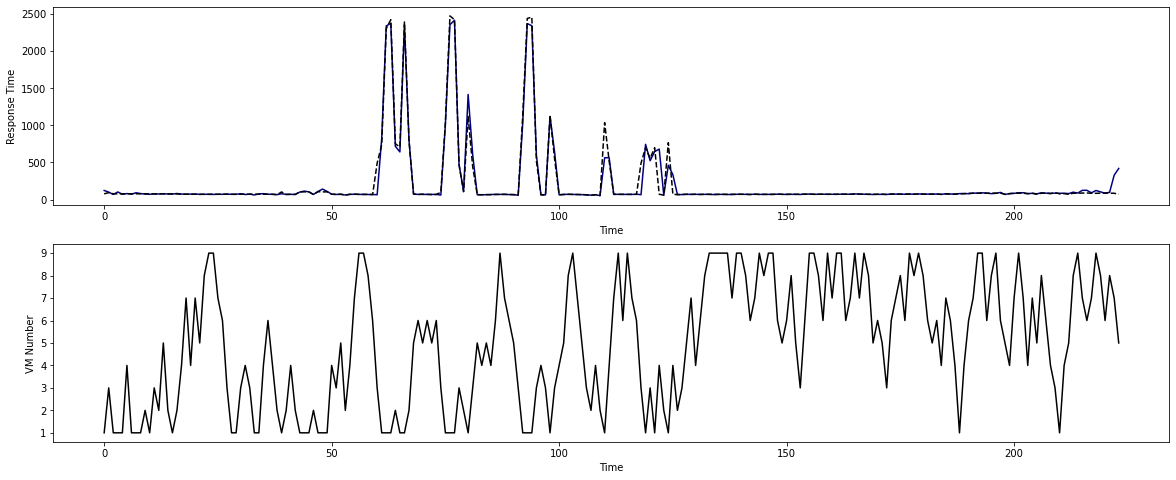

In [62]:
plot_pred_short(train_labels.values, pred_rt_nn)

In [63]:
print('{0}'.format(train_features.shape))
print('{0}'.format(train_features[:3, :]))

(224, 12)
[[1.  0.4 0.  1.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0. ]
 [1.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0. ]]


## Konkluzió

A helyzet katasztrófális.

Ugyanis simán a **'request_rate'** és a kategóriára kódolt **'worker_number'** alapján képes volt a neruális háló egy szinte tökéletes becslésére az rt-nek. De ha nem is tökéletes legalább, vagy ugyan annyira jó mint a metrikák alapján adott becslés.

Tehát valamit ki kell találnom, hogy miért jobb a metirkákat mérni, mintha csak a **'request_rate'** és a kontrollált **'worker_number'** szám alapján becsülöm a válaszidőt.

## Amíg a fenti kérdésen gondolokozom

Kiváncsi vagyok, hogy milyen eredményt adott volna a neurális háló ha
1. nem kategóriára van kódolva a 'worker_number'
2. csak egyik vagy csak másik válotzó alapján

### Csak a 'request_rate' alapján

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization

Ha van egy kis időm akkor a fenti linket átnézni:

Amúgy itt a megoldás de brutál hogy mennyire nehéz volt megtalálni:

https://www.tensorflow.org/tutorials/keras/regression

```
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)
```

-------------------------------
train_feautues.shape (224, 1)
-------------------------------
-------------------------------
[[15.72]]
First example: [[0.4]]
Normalized   : [[-1.25]]
-------------------------------


Training:   0%|           0/1500 ETA: ?s,  ?epochs/s

2023-05-19 08:46:12.857086: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-19 08:46:12.949982: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-19 08:46:34.266980: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-19 08:46:42.917928: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-19 08:46:42.957975: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-19 08:46:56.243359: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-19 08:46:59.792069: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-19 08:47:00.141427: W tensorflow/core/data/root_dataset.cc:26

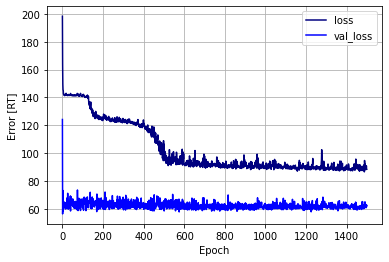

In [66]:
# Csak a jó linregesek (17.8%)
input_variables = ['request_rate',
                   'CPU0Idle%',
                   '[NUMA:0]Anon',
                   '[NUMA:0]Mapped',
                   '[NUMA:0]Inactive',
                   '[TCPD]InSegs',
                   '[TCPD]OutSegs']

# Fent -> hiába tökéletes a model az actionok után hülyeségeket mond

# A kevesebb több (24.8%)
input_variables = ['request_rate',
                   'CPU0User%',
                   '[TCPD]OutSegs']

# Fent -> még akkor is ha ez a model rosszabb becslést ad az actionok után sokkal jobb

# train_features = inputs # 'request_rate' és 'woker_number' (kategóriára kódolva)

input_variables = ['request_rate']

train_features = df[input_variables]
train_labels = df[['response_time']]

print('-------------------------------')
print('train_feautues.shape', train_features.shape)
print('-------------------------------')

normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=-1)
normalizer.adapt(np.array(train_features))

print('-------------------------------')
with np.printoptions(precision=2, suppress=True):
    print(normalizer.mean.numpy())

first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print('Normalized   :', normalizer(first).numpy())
print('-------------------------------')

first_model_rr = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(30, activation='tanh'),
    tf.keras.layers.Dense(15, activation='ReLU'),
    layers.Dense(units=1)
])

# first_model_rr.summary()

first_model_rr.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

history_rr = first_model_rr.fit(
    train_features,
    train_labels,
    epochs = 1500,
    # batch_size = 300,
    verbose = 0,
    callbacks=[tqdm_callback],
    validation_split = 0.05)

plot_loss(history_rr)

# train_feautues.shape (224, 2)
# -------------------------------
# -------------------------------
# [[15.72 22.25]]
# First example: [[0.4 9.8]]
# Normalized   : [[-1.25 -0.77]]
# -------------------------------

7/7 [==============================] - 0s 2ms/step


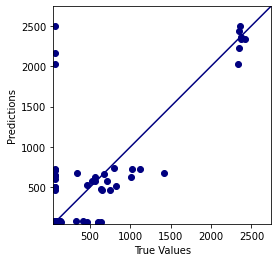

In [67]:
pred_rt_nn_with_rr = first_model_rr.predict(train_features)

pred_rt_nn_with_rr = np.squeeze(pred_rt_nn_with_rr, 1)

plot_true_vs_pred(train_labels.values, pred_rt_nn_with_rr)

slope 0.87 int 49.71
r2 0.63
r  0.80
mse 87413.71


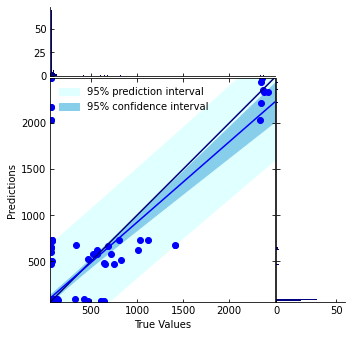

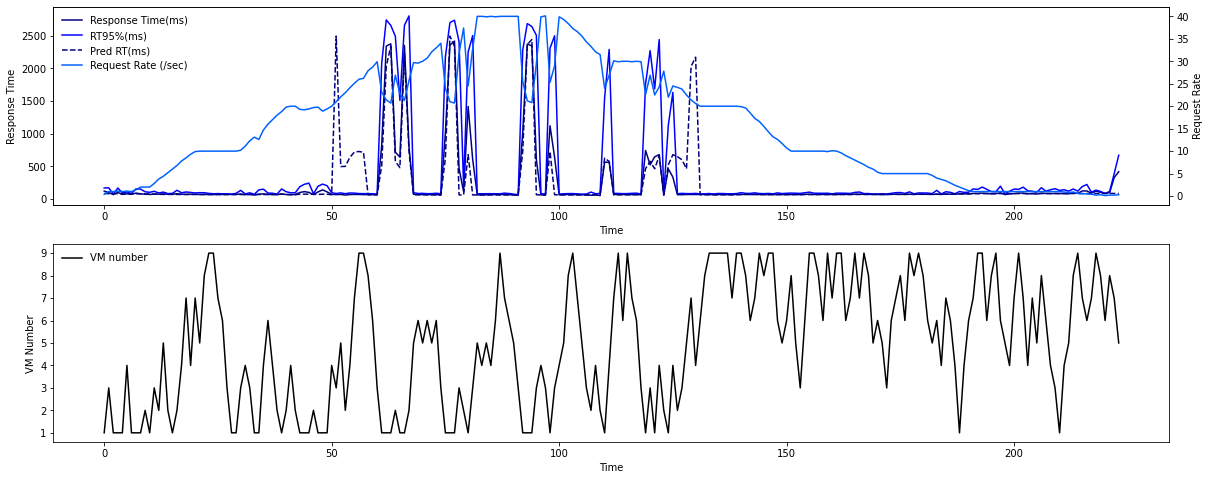

In [68]:
plot_true_vs_pred_hist_conf(np.squeeze(train_labels.values, 1), pred_rt_nn_with_rr, 3.0)

plot_pred(pred_rt_nn_with_rr)

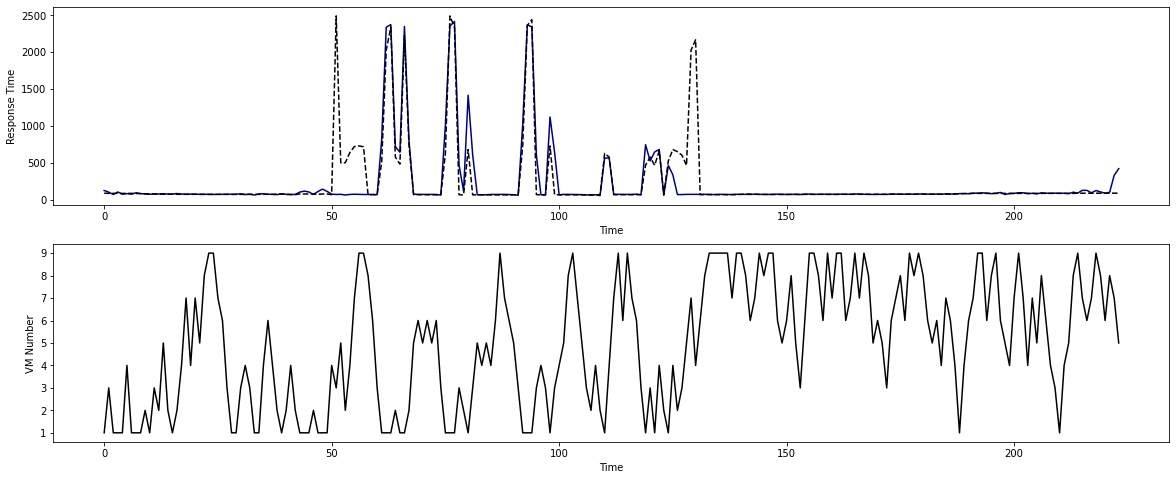

In [70]:
plot_pred_short(train_labels.values, pred_rt_nn_with_rr)

## Kis túlzással majdnem jó modelt adott az NN(30,15) az RT-re csupán az RR alapján

Mi is történik valójában?

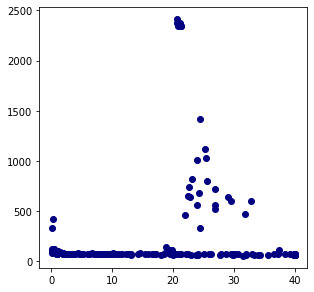

In [71]:
# Plot rr _ vs _ rt

plt.figure(figsize=(4.8, 4.8))
plt.scatter(df['request_rate'], df['response_time'])
plt.show()

# Erre képes voltam találni egy olyan függvényt ami rr -ből csinál -> rt-t.

# Ha ez nem overfitting akkor semmi.

(400,) (400, 1)


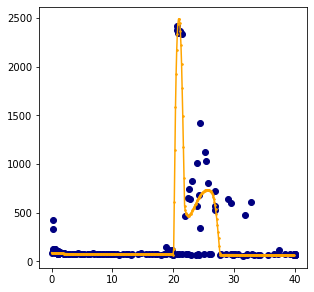

In [78]:
# egy oszlopos inputhoz
_x = np.arange(0, 40, 0.1)
__x = _x.reshape(-1, 1)
print(_x.shape, __x.shape)

# -
_pred_rt_by_x = first_model_rr.predict(__x, verbose = 0)

plt.figure(figsize=(4.8, 4.8))
plt.scatter(df['request_rate'], df['response_time'])
plt.plot(_x, _pred_rt_by_x, color='orange')
plt.scatter(_x, _pred_rt_by_x, color='orange', s=2.5)
plt.show()

# Erre képes voltam találni egy olyan függvényt ami rr -ből csinál -> rt-t.

# Ha ez nem overfitting akkor semmi.


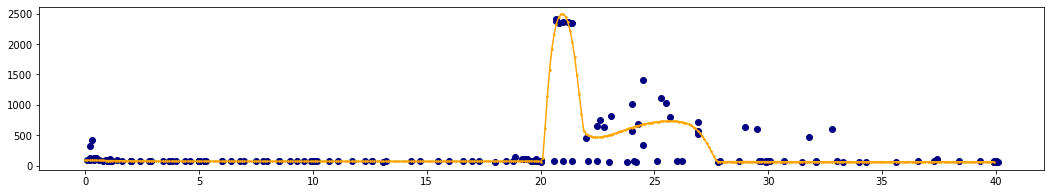

In [84]:
plt.figure(figsize=(18, 3))
plt.scatter(df['request_rate'], df['response_time'])
plt.plot(_x, _pred_rt_by_x, color='orange')
plt.scatter(_x, _pred_rt_by_x, color='orange', s=2.5)
plt.show()

# Oké

## Mi látszik?

Az, hogy túl tudom tanítani a neurális háló modelt nagyon könnyen még egy változó esetében is és ebből az áll elő, hogy - bár nagyon jó becséseket ad - ezek egyszerűen azért vannak mert túltanult a model (bizonyos értelemben)

---

Ugyanakkor a fenti ábrán a **'request_rate'** esetében az is látszik, hogyha csak ennek az egy változónak a segítségével akarnám közelíteni a **'response_time'** válaszidőt akkor azért vannak olyan pontok amelyeket nem lehet jól leírni ennek a modellnek a segítségével. Ezek a pontok leginkább a $rr = 25 \pm 5$ körnéyékén vannak.

## Nézzük meg ugyan ezt csak a CPU0User esetében

-------------------------------
train_feautues.shape (224, 1)
-------------------------------
-------------------------------
[[22.25]]
First example: [[9.8]]
Normalized   : [[-0.77]]
-------------------------------


Training:   0%|           0/1500 ETA: ?s,  ?epochs/s

2023-05-19 09:05:19.247029: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-19 09:05:19.295463: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-19 09:05:19.382050: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-19 09:05:19.429310: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-19 09:05:28.395458: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-19 09:05:28.441978: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-19 09:05:51.163155: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-19 09:06:00.118672: W tensorflow/core/data/root_dataset.cc:26

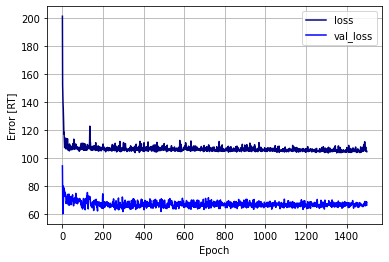

In [86]:
# train_features = inputs # 'request_rate' és 'woker_number' (kategóriára kódolva)

input_variables = ['CPU0User%']

train_features = df[input_variables]
train_labels = df[['response_time']]

print('-------------------------------')
print('train_feautues.shape', train_features.shape)
print('-------------------------------')

normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=-1)
normalizer.adapt(np.array(train_features))

print('-------------------------------')
with np.printoptions(precision=2, suppress=True):
    print(normalizer.mean.numpy())

first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print('Normalized   :', normalizer(first).numpy())
print('-------------------------------')

first_model_cpu = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(30, activation='tanh'),
    tf.keras.layers.Dense(15, activation='ReLU'),
    layers.Dense(units=1)
])

# first_model_cpu.summary()

first_model_cpu.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

history_cpu = first_model_cpu.fit(
    train_features,
    train_labels,
    epochs = 1500,
    # batch_size = 300,
    verbose = 0,
    callbacks=[tqdm_callback],
    validation_split = 0.05)

plot_loss(history_cpu)


(1000,) (1000, 1)


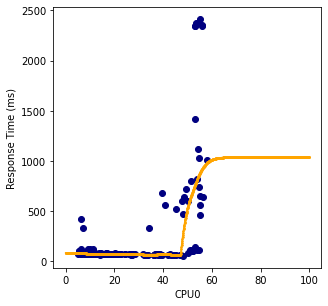

In [91]:
# egy oszlopos inputhoz
_x = np.arange(0, 100, 0.1)
__x = _x.reshape(-1, 1)
print(_x.shape, __x.shape)

# -
_pred_rt_by_x = first_model_cpu.predict(__x, verbose = 0)

plt.figure(figsize=(4.8, 4.8))
plt.scatter(df['CPU0User%'], df['response_time'])
plt.plot(_x, _pred_rt_by_x, color='orange')
plt.scatter(_x, _pred_rt_by_x, color='orange', s=2.5)
plt.xlabel('CPU0')
plt.ylabel('Response Time (ms)')
plt.show()

# Erre képes voltam találni egy olyan függvényt ami cpu -ből csinál -> rt-t.

# Ha ez nem overfitting akkor semmi.


7/7 [==============================] - 0s 3ms/step


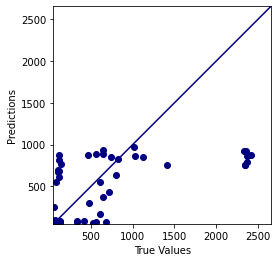

In [101]:
pred_rt_nn_with_cpu = np.squeeze(first_model_cpu.predict(train_features), 1)

plot_true_vs_pred(train_labels.values, pred_rt_nn_with_cpu)

slope 0.40 int 82.72
r2 0.53
r  0.73
mse 96885.48


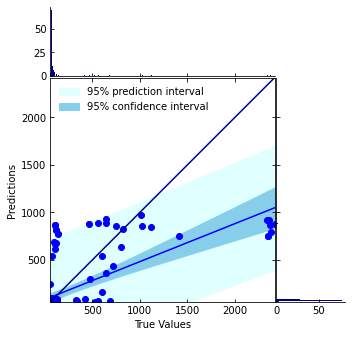

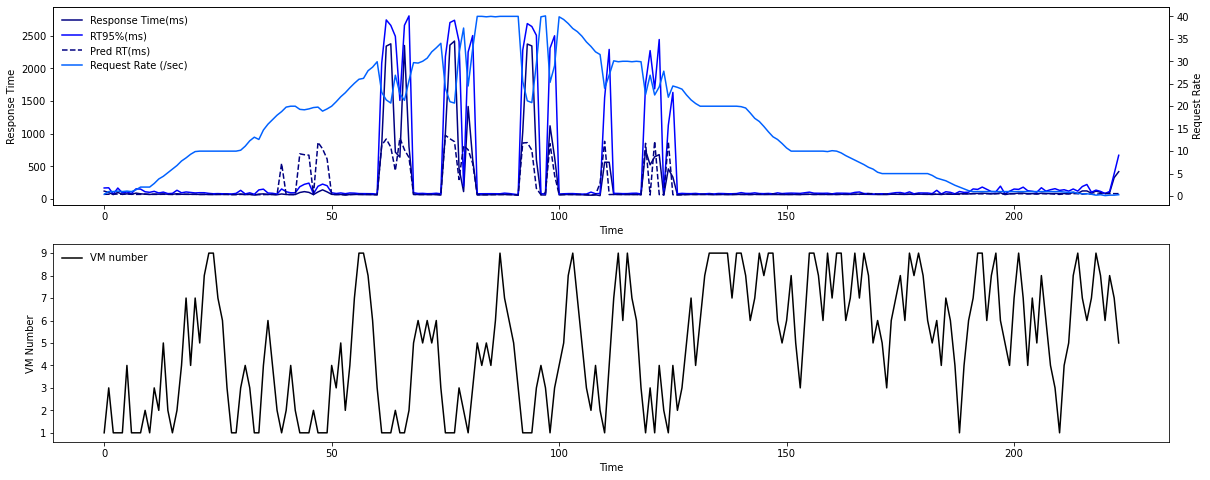

In [102]:
plot_true_vs_pred_hist_conf(np.squeeze(train_labels.values, 1), pred_rt_nn_with_cpu, 3.0)

plot_pred(pred_rt_nn_with_cpu)

# Oké

## Mi látszik?

Megpróbáltam csinálni egy neurális hálót ahol csak a **'CPU0User%'** segítésgével próáltam becsülni a válaszidőt.

Ez önmaggában nem sikerült olyan jól. Miközben ezzel a neurális háló architekturúval szinte bármit meg lehetne tanulni.

---

Ennek a jelenségnek ugyan az az okat amit a **'request_rate'** esetében láttam. Hogy van a **'CPU0User%'** változóban egy olyan tartomány $\text{CPU0User} = 50 \pm 3$ ahová több **'request_rate'** is tartozik. (lásd a fenti ábra)

## Csak kiviből, mutatok egy jó trükköt.

Feltenítom ugyan ezt a modelt de a workerek számával **'worker_number'** kiegészítve.

És a 'CPU' becslést úgy fogok ábrázolni, hogy worker numberekenkét külön külön.

-------------------------------
[[ 4.94 22.25]]
First example: [[1.  9.8]]
Normalized   : [[-1.44 -0.77]]
-------------------------------


Training:   0%|           0/150 ETA: ?s,  ?epochs/s

2023-05-19 11:51:18.472640: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


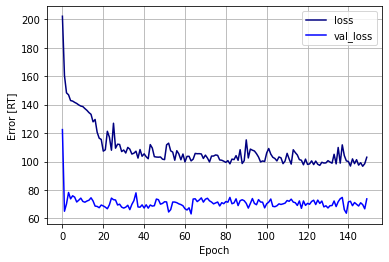

In [253]:
# train_features = inputs # 'request_rate' és 'woker_number' (kategóriára kódolva)

input_variables = ['worker_number',
                   'CPU0User%']

train_features = df[input_variables]
train_labels = df[['response_time']]

# Itt el lehet csúszni, ha nem állítom át az input_shape-t
# normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=-1)
normalizer = tf.keras.layers.Normalization(input_shape=[2,], axis=-1)
normalizer.adapt(np.array(train_features))

print('-------------------------------')
with np.printoptions(precision=2, suppress=True):
    print(normalizer.mean.numpy())

first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print('Normalized   :', normalizer(first).numpy())
print('-------------------------------')

first_model_cpu_wm = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(30, activation='tanh'),
    tf.keras.layers.Dense(15, activation='ReLU'),
    layers.Dense(units=1)
])

first_model_cpu_wm.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

history_cpu_wm = first_model_cpu_wm.fit(
    train_features,
    train_labels,
    epochs = 150,
    # batch_size = 300,
    verbose = 0,
    callbacks=[tqdm_callback],
    validation_split = 0.05)

plot_loss(history_cpu_wm)


#-------------------------------
#[[ 4.94 22.25]]
#First example: [[1.  9.8]]
#Normalized   : [[-1.44 -0.77]]
#-------------------------------


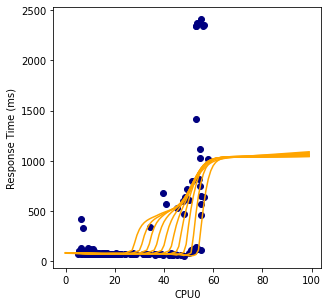

In [254]:
plt.figure(figsize=(4.8, 4.8))
plt.scatter(df['CPU0User%'], df['response_time'])

# cpu [0-100]
_x = np.arange(0, 100, 1)
_x0 = _x.reshape(-1, 1)

# wm_numbert kell beleraknom
for _wn in range(0, 10):
    _x1 = _x0
    _x2 = np.full(_x1.shape, _wn)
    x12 = np.hstack((_x2, _x0)) # worker_number és cpu
    
    _pred_rt_by_x = first_model_cpu_wm.predict(x12, verbose = 0)

    plt.plot(_x, _pred_rt_by_x, color='orange')
    # plt.scatter(_x, _pred_rt_by_x, color='orange', s=2.5)

plt.xlabel('CPU0')
plt.ylabel('Response Time (ms)')
plt.show()

# Erre képes voltam találni egy olyan függvényt ami cpu -ből csinál -> rt-t.

# Ha ez nem overfitting akkor semmi.


7/7 [==============================] - 0s 2ms/step


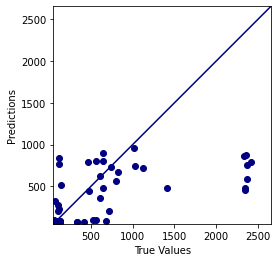

In [255]:
pred_rt_nn_with_cpu_wm = np.squeeze(first_model_cpu_wm.predict(train_features), 1)

plot_true_vs_pred(train_labels.values, pred_rt_nn_with_cpu_wm)

slope 0.33 int 74.66
r2 0.53
r  0.73
mse 106937.81


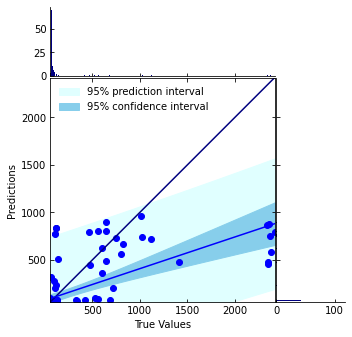

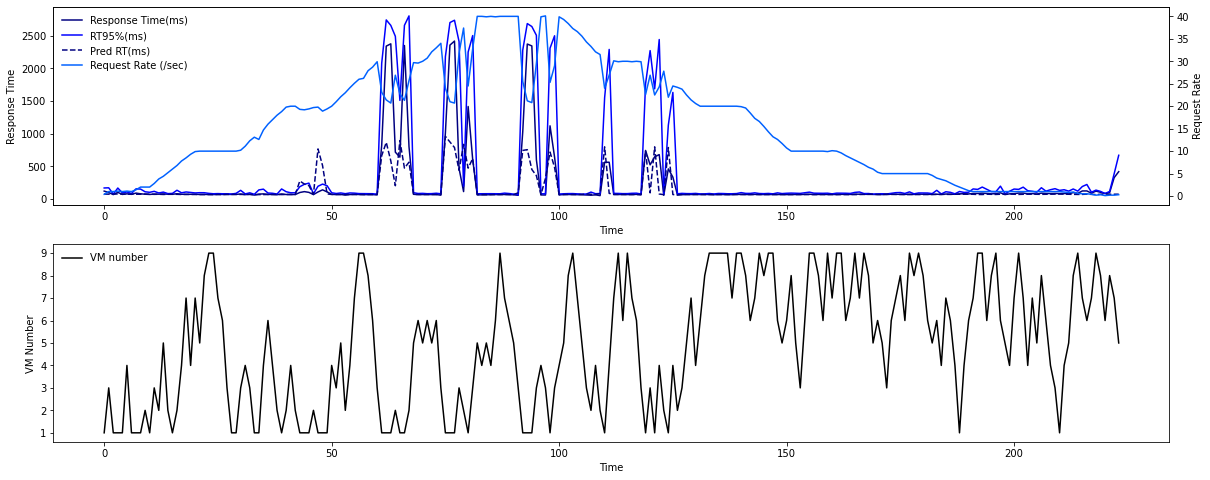

In [256]:
plot_true_vs_pred_hist_conf(np.squeeze(train_labels.values, 1), pred_rt_nn_with_cpu_wm, 3.0)

plot_pred(pred_rt_nn_with_cpu_wm)

# Oké

## Mi látszik?

Megpróbáltam csinálni egy neurális hálót ahol csak a **'CPU0User%'** és a nem kategóriázált **'worker_number'** segítésgével próáltam becsülni a válaszidőt.

Ez önmaggában nem sikerült olyan jól. Miközben ezzel a neurális háló architekturúval szinte bármit meg lehetne tanulni.

---

Amit plusztban szerettem volna megcsinálni, hogy **'worker_number'** értékenként külön külön ábrázolom a becslést a **'CPU0User%'** függvényében.

Ez sem sikerült olyan jól, mert ahogy látom a **'worker_number'** nem differenciál olyan jól mint gondoltam.

---

A következő kisérletben ugyan ezt fogom megnézni csak a **'CPU0User%'** helyett a **'request_rate'** változót fogom megnézni.

-------------------------------
[[ 4.94 15.72]]
First example: [[1.  0.4]]
Normalized   : [[-1.44 -1.25]]
-------------------------------


Training:   0%|           0/150 ETA: ?s,  ?epochs/s

2023-05-19 11:53:28.939666: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


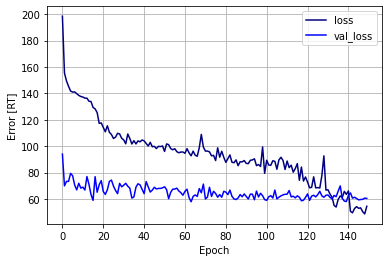

In [259]:
# train_features = inputs # 'request_rate' és 'woker_number' (kategóriára kódolva)

input_variables = ['worker_number',
                   'request_rate']

train_features = df[input_variables]
train_labels = df[['response_time']]

# Itt el lehet csúszni, ha nem állítom át az input_shape-t
# normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=-1)
normalizer = tf.keras.layers.Normalization(input_shape=[2,], axis=-1)
normalizer.adapt(np.array(train_features))

print('-------------------------------')
with np.printoptions(precision=2, suppress=True):
    print(normalizer.mean.numpy())

first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print('Normalized   :', normalizer(first).numpy())
print('-------------------------------')

first_model_rr_wm = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(30, activation='tanh'),
    tf.keras.layers.Dense(15, activation='ReLU'),
    layers.Dense(units=1)
])

first_model_rr_wm.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

history_rr_wm = first_model_rr_wm.fit(
    train_features,
    train_labels,
    epochs = 150,
    # batch_size = 300,
    verbose = 0,
    callbacks=[tqdm_callback],
    validation_split = 0.05)

plot_loss(history_rr_wm)


#-------------------------------
#[[ 4.94 22.25]]
#First example: [[1.  9.8]]
#Normalized   : [[-1.44 -0.77]]
#-------------------------------


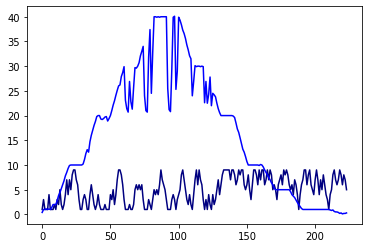

In [260]:
plt.plot(train_features)

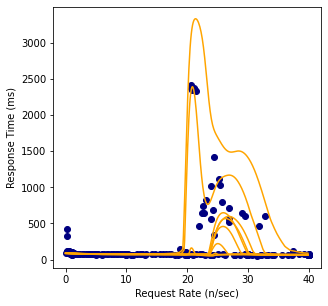

In [261]:
plt.figure(figsize=(4.8, 4.8))
plt.scatter(df['request_rate'], df['response_time'])

# request_rate [0-40]
_x = np.arange(0, 40, 0.1)
_x0 = _x.reshape(-1, 1)

# wm_numbert kell beleraknom
for _wn in range(0, 10):
    _x1 = _x0
    _x2 = np.full(_x1.shape, _wn)
    x12 = np.hstack((_x2, _x0)) # worker_number és request_rate
    
    _pred_rt_by_x = first_model_rr_wm.predict(x12, verbose = 0)

    plt.plot(_x, _pred_rt_by_x, color='orange')
    # plt.scatter(_x, _pred_rt_by_x, color='orange', s=2.5)

plt.xlabel('Request Rate (n/sec)')
plt.ylabel('Response Time (ms)')
plt.show()

# Erre képes voltam találni egy olyan függvényt ami cpu -ből csinál -> rt-t.

# Ha ez nem overfitting akkor semmi.


7/7 [==============================] - 0s 2ms/step


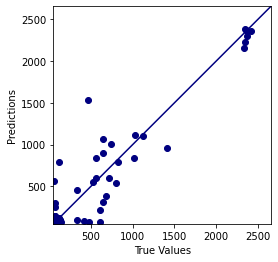

In [262]:
pred_rt_nn_with_rr_wm = np.squeeze(first_model_rr_wm.predict(train_features), 1)

plot_true_vs_pred(train_labels.values, pred_rt_nn_with_rr_wm)

slope 0.96 int 9.97
r2 0.91
r  0.96
mse 16749.31


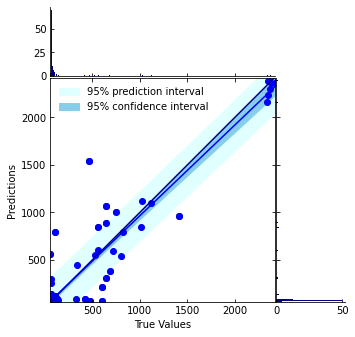

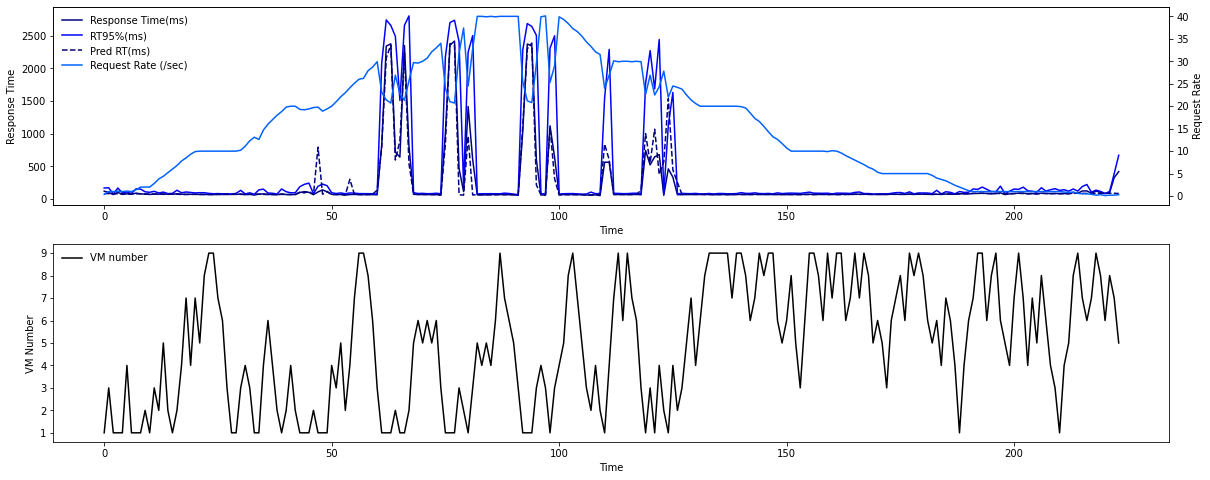

In [263]:
plot_true_vs_pred_hist_conf(np.squeeze(train_labels.values, 1), pred_rt_nn_with_rr_wm, 3.0)

plot_pred(pred_rt_nn_with_rr_wm)

# Oké

## Mi látszik?

Megpróbáltam csinálni egy neurális hálót ahol csak a **'request_rate%'** és a nem kategóriázált **'worker_number'** segítésgével próáltam becsülni a válaszidőt.

Ez önmaggában elég jól sikerült. Bár az is igaz, hogy az a neruális háló architechtúra amit adtam neki hajlamos a túl tanulásra.

---

A konklúzió amit ebből levonhatok, hogy önmagában a **'request_rate'** és a **'worker_number'** képes elég pontosan megbecsülni a válaszidőt.

Ez alapján **sajnos felmerül a kérdés**, hogy akkor mi szükségünk van a többi metrikára.

---

Nem szabad elfelejteni, hogy az így levont konklúzió csak erre az egy típusú **Train15** feladatra igaz.

## Következő

Amit most szeretnék elvégezni, hogy egy sokkal egyszerűbb neurális háló architektúrával megcsinálom ugyan ezeket a méréseket úgy is hogy beveszem a metrikákat.

Tehát ami itt összehasonlításra kerüla az a **'request_rate'** és **'worker_number'** model és ugyan ez kiegészítve a **'metrikákkal'**.

---

Mivel a **'request_rate'** és **'worker_number'** modellt már megcsináltam, most csak a metrikával kiegészített verziót kell megcsinálnom.


In [244]:
print(input_variables)

['CPU0Total%', '[NUMA:0]Slab', '[TCPD]OutSegs', '[DSK:sda]Reads', '[DSK:sda]RKBytes', '[NUMA:0]Free', '[NUMA:0]Mapped']


In [247]:
# mindegyikhez elkészíteni hogy mi lenne a fel leskálázás utáni értéke

A = [i for i in range(-7, 8, 1)]

print(A)

# -2.
# inicalizálni egy üres dictianary-t a dict(action, predicted_response_time) pároknak
r = []
al = []
rl = []

# -1.
# kiválasztani, hogy milyen értéket mérek aktuális metrikákként
# ideiglenesen az mf utolsó értékei lesznek a bemenők

__N = 84

__current_response_time = mf['response_time_p95'].values[__N]
__last_metrics = mf[input_variables].values[__N]
__w = mf['worker_number'].values[__N]

print('-----------------------------------------')
print('__last_metrics -> vagyis a current values')
with np.printoptions(precision=2, suppress=True):
    print(__last_metrics)
print(colored('__current_rt -> \t' + str(__current_response_time), 'red'))
print(colored('__w -> worker_number \t' + str(__w), 'red'))

print('-----------------------------------------')

print(input_variables)
print('-----------------------------------------')

for a in A:
    
    # Ez kell, hogy a VM szám (w) ne legyen 0
    if __w + a != 0:
    
        # 0.
        # inicializálni egy üres tömböt az input_variable változónak
        _new_train_features = np.zeros((1, mf[input_variables].shape[1]))


        # 1.
        # minden metrikára kiszámolni
        for i, metric in enumerate(input_variables):
            # print(i, metric)
            if metric != 'worker_number':

                # 2.
                # megcsinálni a linreg modelt az adott metrikára (tanítás)
                __metric_term, __metric_next = create_term_for_metric(metric)
                __lr_model = calc_pred_for_metric(__metric_term.values, __metric_next.values)
                
                # 3.
                # elmenetni az adott modelt (amit nem használok sehol)
                # _ = joblib.dump(__lr_model, './lr/lr_' + metric + '.joblib', compress=9)
                
                # 3.
                # az előbbi model alapján egy becslés egy konkrét értékre (value, w, k)
                __metric_term = create_term_for_prediction(__last_metrics[i], __w, a)                
                # print('---a metrica értékének becsése (value, w, k alapján ---')
                # print(__metric_term)
                # print(metric)
                # print(a)
                # print('------------------')
                __pred_metric = __lr_model.predict(__metric_term)
                
                # 4.
                # adott becsült metrikát bele kell helyezni a neurális háló bemeneti változójához
                _new_train_features[0, i] = __pred_metric
                # print(_new_train_features)
            
                
        # 5.
        # megvan az új a-hoz tartozó metika tömb, ez alapján becsüjük meg a válaszidőt
        with np.printoptions(precision=2, suppress=True):
            print(_new_train_features)
        
        # 6.
        # a neurális háló model segítségével megbecsülöm a válaszidőt
        
        __predicted_response_time = first_model.predict(_new_train_features, verbose = 0)
        
        with np.printoptions(precision=2, suppress=True):
            print('action = ', a, ' --> rt --> ', __predicted_response_time, '\n')


[-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]
-----------------------------------------
__last_metrics -> vagyis a current values
[   58.2 88600.   2113.4    58.4  1603.8 77858.  37145.2]
__current_rt -> 	82.3504
__w -> worker_number 	5
-----------------------------------------
['CPU0Total%', '[NUMA:0]Slab', '[TCPD]OutSegs', '[DSK:sda]Reads', '[DSK:sda]RKBytes', '[NUMA:0]Free', '[NUMA:0]Mapped']
-----------------------------------------
[[   -5.99 88487.39 -1412.93    79.75  2363.62 73101.92 37879.2 ]]
action =  -7  --> rt -->  [[68.65]] 

[[  -48.8  88445.94 -3829.45    90.08  2704.34 70651.1  38374.04]]
action =  -6  --> rt -->  [[100.53]] 

[[  122.45 88611.74  5836.64    48.78  1341.47 80454.38 36394.7 ]]
action =  -4  --> rt -->  [[2762.02]] 

[[   79.63 88570.29  3420.12    59.1   1682.19 78003.56 36889.53]]
action =  -3  --> rt -->  [[66.31]] 

[[   65.36 88556.47  2614.61    62.54  1795.76 77186.62 37054.48]]
action =  -2  --> rt -->  [[62.83]] 

[[   58.23 88549.56  221

In [246]:
from sklearn.linear_model import LinearRegression

def create_term_for_metric(columnname: str):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)

    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __metric_term = f1[[__metric_term1, __metric_term2]]
    __metric_next = f1[__next_name]
    
    return __metric_term, __metric_next

def create_term_for_prediction(value: float, w: int, k: int):
    
    __metric_term1 = value * w/(w+k)
    __metric_term2 = value * k/(w+k)
    
    __metric_term = np.array([[__metric_term1, __metric_term2]])
    
    return __metric_term

def calc_pred_for_metric(__metric_term, __metric_next):

    lr = LinearRegression(fit_intercept=True)

    rr = lr.fit(__metric_term, __metric_next)

    __fit_score = rr.score(__metric_term, __metric_next)
    __fit_coef_ = rr.coef_
    __fit_intercept_ = rr.intercept_
    
    __pred_metric = rr.predict(__metric_term)
    
    return rr
    
    

In [ ]:
# Az egy jó jel, hogyha nem változtatná a vm-ek számát vagyis a k=0, akkor a linreg becsés alapján
# adott új metrika érétkek
# és az ezek alapján adott becslése a válaszidőnek
# nagyon közel áll az éppen mért válaszidő értékéhez,
# ez egy nagyon jó jel, jele annak, hogy a két model jól működik

In [328]:
# A következő feladat

# Ha jól látom ez a Train10 könyvtár

# Tehát ebbe a könyvtárba megírni azt, hogy a feltanított modell alapján skálázzon,.

# És fontos az is, hogy ugyan itt legyen letárolva a terhelést végző jmx profil is,
# hogy ugyan az alapján tudjam terhelni ami alapján tanítottam.
# (egyezzenek a végpontok, stb.)

In [329]:
# Teendő 1

# Kiexportálni az itt feltanított model.

# Keras

first_model.save(os.getcwd())

# first_model.save('model.h5')


INFO:tensorflow:Assets written to: /home/ubuntu/Scaler/Train/Train14/assets


INFO:tensorflow:Assets written to: /home/ubuntu/Scaler/Train/Train14/assets


In [330]:

model = keras.models.load_model(os.getcwd())

# Let's check:
np.testing.assert_allclose(
    first_model.predict(_new_train_features), model.predict(_new_train_features)
)


1/1 [==============================] - 0s 86ms/step


In [331]:
# https://www.tensorflow.org/tutorials/keras/regression

In [383]:

def moric(__n, debug=False):
    'Az adatsorban minden elemre kiszámolja, hogy mi lett volna a válaszidő különböz k-mellett'
    
    results = []
    results_dict = []

    A = [i for i in range(-9, 10, 1)]

    # n-edik elem lesz kiválasztva a 'mf' dataframeből
    __N = __n

    __current_response_time = mf['response_time_p95'].values[__N]
    __last_metrics = mf[input_variables].values[__N]
    __w = mf['worker_number'].values[__N]
    
    if debug == True:
        print('RT = ', __current_response_time)
        print('w  = ', __w)
        with np.printoptions(precision=2, suppress=True):
            print(__last_metrics)

    for a in A:

        # Ez kell, hogy a VM szám (w) ne legyen 0
        if __w + a != 0:

            # 0.
            # inicializálni egy üres tömböt az input_variable változónak
            _new_train_features = np.zeros((1, mf[input_variables].shape[1]))

            # 1.
            # minden metrikára kiszámolni
            for i, metric in enumerate(input_variables):
                # print(i, metric)
                if metric != 'worker_number':

                    # 2.
                    # megcsinálni a linreg modelt az adott metrikára (tanítás)
                    __metric_term, __metric_next = create_term_for_metric(metric)
                    __lr_model = calc_pred_for_metric(__metric_term.values, __metric_next.values)

                    # 3.
                    # az előbbi model alapján egy becslés egy konkrét értékre (value, w, k)
                    __metric_term = create_term_for_prediction(__last_metrics[i], __w, a)                
                    __pred_metric = __lr_model.predict(__metric_term)

                    # 4.
                    # adott becsült metrikát bele kell helyezni a neurális háló bemeneti változójához
                    _new_train_features[0, i] = __pred_metric
                    # print(_new_train_features)

            # 5.
            # megvan az új a-hoz tartozó metika tömb, ez alapján becsüjük meg a válaszidőt
            if debug == True:
                with np.printoptions(precision=2, suppress=True):
                    print(_new_train_features)

            # 6.
            # a neurális háló model segítségével megbecsülöm a válaszidőt
            _ = time.time()
            __predicted_response_time = first_model.predict(_new_train_features, verbose = 0, batch_size=10, use_multiprocessing=True)
            # print(time.time()-_)
            
            # X.
            # megpróbálom felgyorsítani, hogy a numpy számoja a pred válaszidőt
            # W = first_model.get_weights()
            # __px = predict(_new_train_features)
            # print(__px, __predicted_response_time.flatten()[0])
            
            results_dict.append({'action': a, 'prt': __predicted_response_time.flatten()[0]})
            results.append(__predicted_response_time.flatten()[0])
            
    return results


In [372]:
len(mf)

134

In [348]:
a_prts = []
# for i in mf.shape[0]:
for i in track(range(len(mf))):
    _ = moric(i)
    a_prts.append(_)
    

Output()

2023-05-10 16:57:03.004009: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-10 16:57:43.415291: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-10 16:59:45.609294: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


In [357]:
len(a_prts)

134

In [358]:
# ha különböző hosszú ez a fos akkor baj van

a = set()

for i in range(len(a_prts)):
    a.add(len(a_prts[i]))

a

{18}

In [362]:
# Ha csak egy részét akarom az idősornak vizsgálni

a = np.array(a_prts[0:len(a_prts)])
print(a.shape)


a = np.array(a_prts[30:50])
print(a.shape)


(134, 18)
(20, 18)


In [363]:
# Ha csak bizonyos típusú actionoket akarok (pl. 0, 1, .., 5)

a = a[:,6:]
print(a.shape)

(20, 12)


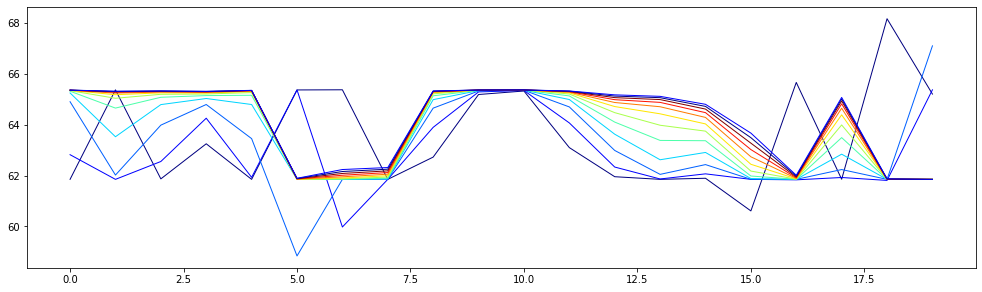

In [364]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

import matplotlib as mpl
from cycler import cycler
mpl.rcParams['lines.linewidth'] = 1
#mpl.rcParams['lines.linestyle'] = '-'
#mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y'])
#mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

colormap = plt.get_cmap('jet')
colors = [colormap(k) for k in np.linspace(0, 1, 10)]

mpl.rcParams['axes.prop_cycle'] = cycler(color=colors)

plt.figure(figsize=(17, 4.8))
plt.plot(a)
plt.show()

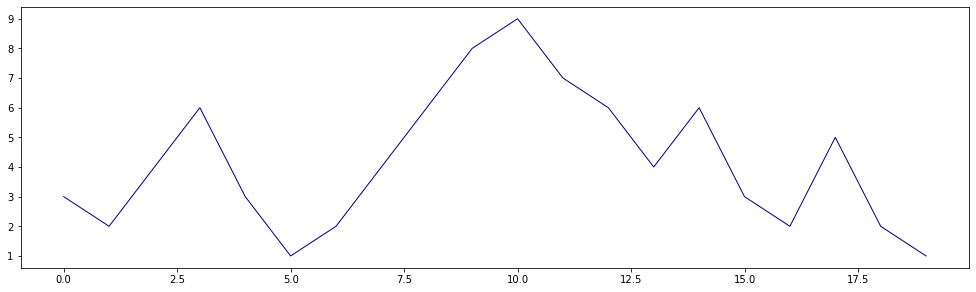

In [388]:
plt.figure(figsize=(17, 4.8))
plt.plot(mf['worker_number'].values[30:50])
plt.show()

In [384]:

# Amit egyszerűen nehezen tudok a mai agyammal felfogni, hogy van az, hogy vannak olyan pontok az idősorban
# amikor tök mindegy hány új vm-et adnék hozzá azt mondja hogy mindíg ugyan az lenne a várható válaszidő.

# Hogy a pékbe van ez?
# Mi miatt van ez így?
# A linreg nem teszi adott helyen a megfellő helyre az új metrika értéket?
# Vagy a neurális háló?

# A fenti est kitűnő példa erre.

# Például a 40-ik eset pont ilyen.

# ---> 

# Lehet, hogy ez olyan helyeken fordul elő, ahol a current worker number maximumon van.

moric(40)

moric(40, debug=True)

RT =  84.772
w  =  9
[   22.7 89664.4    16.2   158.3  4139.4 82171.2 37952. ]
[[   97.08 90303.59    88.15   127.74  3450.36 81052.05 40970.89]]
[[   56.76 89898.14    49.16   138.98  3804.83 81106.83 39141.96]]
[[   43.32 89762.98    36.17   142.72  3922.98 81125.09 38532.31]]
[[   36.61 89695.41    29.67   144.6   3982.06 81134.22 38227.49]]
[[   32.57 89654.86    25.77   145.72  4017.51 81139.69 38044.6 ]]
[[   29.89 89627.83    23.17   146.47  4041.14 81143.35 37922.67]]
[[   27.97 89608.52    21.31   147.    4058.02 81145.95 37835.58]]
[[   26.53 89594.04    19.92   147.4   4070.68 81147.91 37770.26]]
[[   25.41 89582.78    18.84   147.72  4080.52 81149.43 37719.45]]
[[   24.51 89573.77    17.97   147.97  4088.4  81150.65 37678.81]]
[[   23.78 89566.4     17.26   148.17  4094.84 81151.65 37645.56]]
[[   23.17 89560.26    16.67   148.34  4100.22 81152.48 37617.85]]
[[   22.65 89555.06    16.17   148.48  4104.76 81153.18 37594.4 ]]
[[   22.21 89550.6     15.74   148.61  4108.66 811

[85.76027,
 61.860844,
 62.080505,
 63.90139,
 65.03315,
 65.268074,
 65.328476,
 65.3494,
 65.35842,
 65.36295,
 65.36551,
 65.36708,
 65.36812,
 65.36885,
 65.369385,
 65.3698,
 65.37012,
 65.37038]